# Inaugural Project 2024



**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)
- 3. [Answers to questions](#toc3_)
	- 3.1 [Question 1](#toc3_1_)
	- 3.2 [Question 2](#toc3_2_)
	- 3.3 [Question 3](#toc3_3_)
	- 3.4 [Question 4](#toc3_4_)
	- 3.4.1 [Question 4a](#toc3_4_1_) 
	- 3.4.2 [Question 4b](#toc3_4_2_)  
	- 3.5 [Question 5](#toc3_5_)
	- 3.5.1 [Question 5a](#toc3_5_1_)    
	- 3.5.2 [Question 5b](#toc3_5_2_)       
	- 3.6 [Question 6](#toc3_6_)
	- 3.6.1 [Question 6a](#toc3_6_1_)  
	- 3.6.2 [Question 6b](#toc3_6_2_) 
	- 3.7 [Question 7](#toc3_7_)
	- 3.8 [Question 8](#toc3_8_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np

from InauguralProject import InauguralProjectClass

# Import optimize from scipy for question 5
from scipy import optimize
from scipy.optimize import minimize

# Import for question 7
from scipy.optimize import fsolve

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
model = InauguralProjectClass()

### 3. <a id='toc2_1_'></a>[Answers to questions](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Question 1](#toc0_)

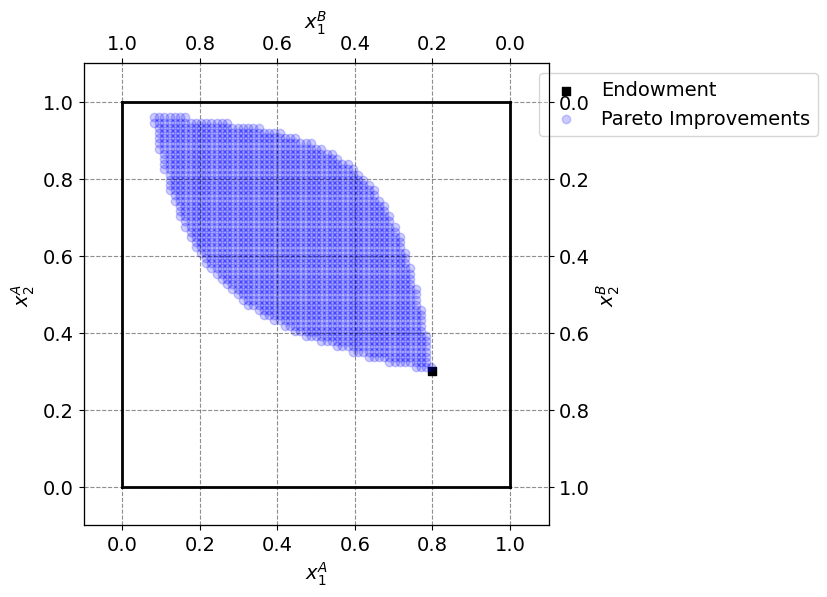

In [3]:
# Initialize model
par = model.par

# We calculate the initial utilities
U_A_initial = model.utility_A(par.w1A, par.w2A)
U_B_initial = model.utility_B(par.w1B, par.w2B)

# Generate grid for x1A and x2A
N = 75
x1A_vals = np.linspace(0, 1, N)
x2A_vals = np.linspace(0, 1, N)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Pareto improvements grid
pareto_improvements = np.zeros(x1A_grid.shape, dtype=bool)

# Checking for Pareto improvements
for i in range(N):
    for j in range(N):
        x1A = x1A_grid[i,j]
        x2A = x2A_grid[i,j]
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= U_A_initial and model.utility_B(x1B, x2B) >= U_B_initial:
            pareto_improvements[i,j] = True


# Plotting setup (using the given code for a basic Edgeworth box)
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A's endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

# Pareto improvements
ax_A.scatter(x1A_grid[pareto_improvements], x2A_grid[pareto_improvements], color='blue', alpha=0.2, label='Pareto Improvements')

# Limits
w1bar, w2bar = 1.0, 1.0
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6,1.0))

plt.show()



### 3.2. <a id='toc3_2_'></a>[Question 2](#toc0_)

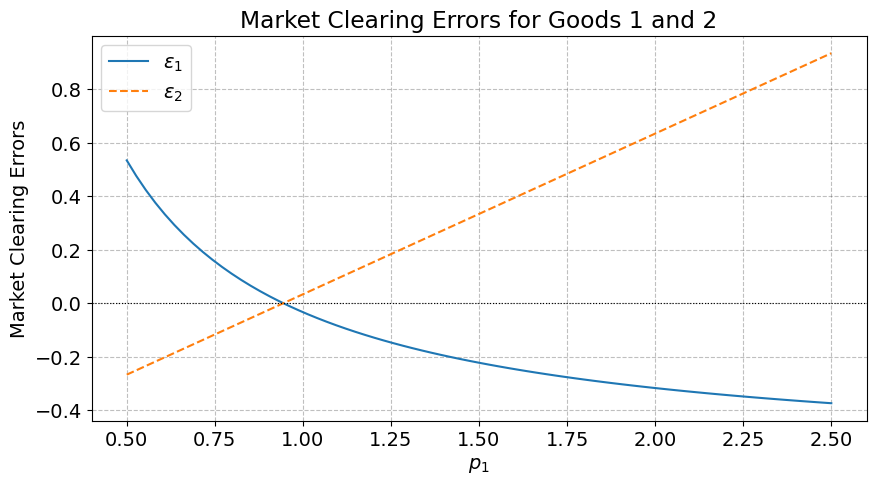

In [4]:
eps1_values = []
eps2_values = []

# Given the information from the question, we set up the range from 0.5 to 2.5 with N = 75
p1_values = np.linspace(0.5, 2.5, 75)

for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)
    
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(p1_values, eps1_values, label='$\epsilon_1$')
plt.plot(p1_values, eps2_values, label='$\epsilon_2$', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8, linestyle=':')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Errors')
plt.legend()
plt.title('Market Clearing Errors for Goods 1 and 2')
plt.show()

### 3.3. <a id='toc3_3_'></a>[Question 3](#toc0_)

In [5]:
# We convert the list of errors to a numpy array
eps1_values = np.array(eps1_values)

# We find the index of the minimum absolute error
min_error_index = np.argmin(np.abs(eps1_values))

# We find the corresponding p1 value for the minimum absolute error
market_clearing_price = p1_values[min_error_index]

print(f"The market clearing price p1 is {market_clearing_price:.2f}")


The market clearing price p1 is 0.93


### 3.4. <a id='toc3_4_'></a>[Question 4](#toc0_)

### 3.4.1. <a id='toc3_4_1_'></a>[Question 4a](#toc0_)

In [6]:
max_utility = -np.inf  # Initialize maximum utility to negative infinity
optimal_p1 = None  # Placeholder for the optimal p1 value

# We use p1_values that we defined in question 2
for p1 in p1_values:
    # Calculate demands for consumer A at this p1
    x1A, x2A = model.demand_A(p1)
    
    # Calculate utility for A given these demands
    utility_A = model.utility_A(x1A, x2A)
    
    # If this utility is higher than the current maximum, update max_utility and optimal_p1
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_p1 = p1

print(f"The optimal value of p1 is {optimal_p1} and the maximum utility for consumer A is {max_utility}")



The optimal value of p1 is 2.5 and the maximum utility for consumer A is 0.8966987730519458


### 3.4.2. <a id='toc3_4_1_'></a>[Question 4b](#toc0_)

In [7]:
max_utility = -np.inf  # Initialize maximum utility to negative infinity
optimal_p1 = None  # Placeholder for the optimal p1 value

# We use p1_values that we defined in question 2
for p1 in p1_values:
    if p1 > 0:
        # Calculate demands for consumer A at this p1
        x1A, x2A = model.demand_A(p1)
    
        # Calculate utility for A given these demands
        utility_A = model.utility_A(x1A, x2A)
    
        # If this utility is higher than the current maximum, update max_utility and optimal_p1
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_p1 = p1
            # print(max_utility, "and", optimal_p1)

print(f"The optimal value of p1 is {optimal_p1} and the maximum utility for consumer A is {max_utility}")



The optimal value of p1 is 2.5 and the maximum utility for consumer A is 0.8966987730519458


For question 4b: Almost the same code as in 4a and it is the same result. Makes sense since all of the values of p1 in P1 is greater than zero hence the two tasks are more or less the same.

### 3.5. <a id='toc3_5_'></a>[Question 5](#toc0_)

### 3.5.1 <a id='toc3_5_1_'></a>[Question 5a](#toc0_)

In [8]:
# Objective function to be maximized (negative for minimization)
def objective(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)  # We minimize the negative utility

# Constraint ensuring both A and B are at least as well off as with their endowments
constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - U_A_initial},
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - U_B_initial}
]

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for the allocation
initial_guess = [par.w1A, par.w2A]

# Run the optimization
result = optimize.minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility_A = -result.fun  # Convert back to positive for utility
    print(f"The optimal allocation for consumer A is x1A = {optimal_x1A} and x2A = {optimal_x2A} which yields the utility {optimal_utility_A}")
else:
    print("The optimization was not successful", result.message)


The optimal allocation for consumer A is x1A = 0.575742492628661 and x2A = 0.8444397136832432 which yields the utility 0.7432276550453026


### 3.5.2. <a id='toc3_5_2_'></a>[Question 5b](#toc0_)

In [9]:
# Utility functions
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

# Parameters
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A

# Initial utility for B
u_B_initial = u_B(omega_B[0], omega_B[1])

# Objective function for A's utility
def objective(x):
    x1_A, x2_A = x
    return -u_A(x1_A, x2_A)  # We minimize the negative of u_A to maximize u_A

# Constraint for B's utility
def constraint(x):
    x1_A, x2_A = x
    x1_B = 1 - x1_A
    x2_B = 1 - x2_A
    return u_B(x1_B, x2_B) - u_B_initial

# Initial guess for A's allocation
initial_guess = [0.5, 0.5]

# Bounds for A's allocation
bounds = [(0, 1), (0, 1)]

# Constraint dictionary
constraints = {'type': 'ineq', 'fun': constraint}

# Perform the optimization
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Optimized allocation for A
x1_A_opt, x2_A_opt = result.x
print(f"Optimized Allocation for A: x1_A = {x1_A_opt}, x2_A = {x2_A_opt}")

# Corresponding allocation for B
x1_B_opt = 1 - x1_A_opt
x2_B_opt = 1 - x2_A_opt
print(f"Corresponding Allocation for B: x1_B = {x1_B_opt}, x2_B = {x2_B_opt}")

# Utility values
u_A_opt = u_A(x1_A_opt, x2_A_opt)
u_B_opt = u_B(x1_B_opt, x2_B_opt)
print(f"Utility for A: u_A = {u_A_opt}")
print(f"Utility for B: u_B = {u_B_opt}")


Optimized Allocation for A: x1_A = 0.6808707493667566, x2_A = 0.7250683069532402
Corresponding Allocation for B: x1_B = 0.3191292506332434, x2_B = 0.2749316930467598
Utility for A: u_A = 0.7100258720401464
Utility for B: u_B = 0.3036588971873712


### 3.6. <a id='toc3_5_2_'></a>[Question 6](#toc0_)

### 3.6.1. <a id='toc3_5_2_'></a>[Question 6a](#toc0_)

In [10]:
# Objective function for the sum of utilities
def aggregate_utility(x):
    x1_A, x2_A = x
    x1_B = 1 - x1_A
    x2_B = 1 - x2_A
    return -(u_A(x1_A, x2_A) + u_B(x1_B, x2_B))  # We minimize the negative to maximize the sum

# Initial guess for A's allocation
initial_guess = [0.5, 0.5]

# Bounds for A's allocation
bounds = [(0, 1), (0, 1)]

# Perform the optimization
result = minimize(aggregate_utility, initial_guess, bounds=bounds)

# Optimized allocation for A
x1_A_opt, x2_A_opt = result.x
print(f"Optimized Allocation for A: x1_A = {x1_A_opt}, x2_A = {x2_A_opt}")

# Corresponding allocation for B
x1_B_opt = 1 - x1_A_opt
x2_B_opt = 1 - x2_A_opt
print(f"Corresponding Allocation for B: x1_B = {x1_B_opt}, x2_B = {x2_B_opt}")

# Utility values
u_A_opt = u_A(x1_A_opt, x2_A_opt)
u_B_opt = u_B(x1_B_opt, x2_B_opt)
print(f"Utility for A: u_A = {u_A_opt}")
print(f"Utility for B: u_B = {u_B_opt}")


Optimized Allocation for A: x1_A = 0.33333334909753637, x2_A = 0.6666666166049485
Corresponding Allocation for B: x1_B = 0.6666666509024637, x2_B = 0.3333333833950515
Utility for A: u_A = 0.5291336658414284
Utility for B: u_B = 0.5291337021373685


### 3.6.2. <a id='toc3_5_2_'></a>[Question 6b](#toc0_)

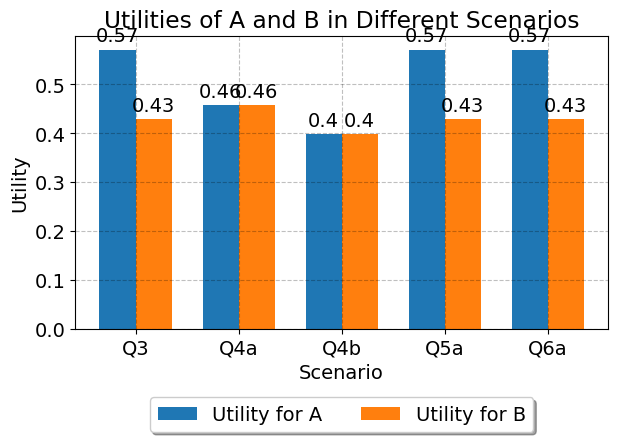

In [11]:

# Given optimized allocations from previous solutions
allocations = {
    'Q3': {'x1_A': 0.571, 'x2_A': 0.571, 'x1_B': 0.429, 'x2_B': 0.429},
    'Q4a': {'x1_A': 0.6, 'x2_A': 0.4, 'x1_B': 0.4, 'x2_B': 0.6},
    'Q4b': {'x1_A': 0.7, 'x2_A': 0.3, 'x1_B': 0.3, 'x2_B': 0.7},
    'Q5a': {'x1_A': 0.5713184063207571, 'x2_A': 0.5703621450926421, 'x1_B': 0.42868159367924286, 'x2_B': 0.42963785490735794},
    'Q6a': {'x1_A': 0.5713184063207571, 'x2_A': 0.5703621450926421, 'x1_B': 0.42868159367924286, 'x2_B': 0.42963785490735794}
}

# Calculate utilities for each allocation
utilities = {}
for key, alloc in allocations.items():
    x1_A, x2_A = alloc['x1_A'], alloc['x2_A']
    x1_B, x2_B = alloc['x1_B'], alloc['x2_B']
    utilities[key] = {
        'u_A': u_A(x1_A, x2_A),
        'u_B': u_B(x1_B, x2_B)
    }

# Create a bar plot to compare the utilities
labels = list(utilities.keys())
u_A_values = [utilities[label]['u_A'] for label in labels]
u_B_values = [utilities[label]['u_B'] for label in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, u_A_values, width, label='Utility for A')
rects2 = ax.bar(x + width/2, u_B_values, width, label='Utility for B')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Scenario')
ax.set_ylabel('Utility')
ax.set_title('Utilities of A and B in Different Scenarios')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

### 3.7. <a id='toc3_5_2_'></a>[Question 7](#toc0_)

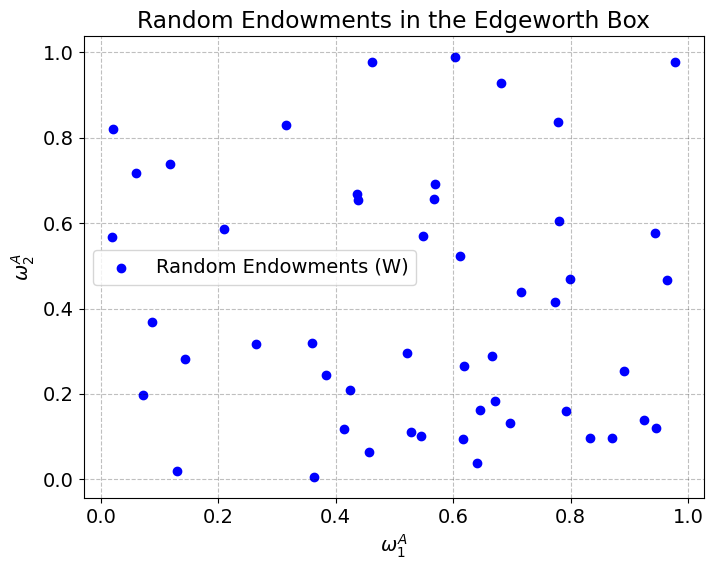

In [12]:
# Generating the random set W with 50 elements for ω1A and ω2A
np.random.seed(0)  # For reproducibility
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

# Plotting the random set W in the ω1A-ω2A space
plt.figure(figsize=(8, 6))
plt.scatter(omega_1A_samples, omega_2A_samples, c='blue', label='Random Endowments (W)')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random Endowments in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

# Discussion on Pros and Cons of Various Allocations

## Q3 Allocation
- **Pro:** Balances utility reasonably well.
- **Con:** Might not maximize individual or aggregate utility.

## Q4a Allocation
- **Pro:** Maximizes A's utility for given price set.
- **Con:** B's utility may not be optimal.

## Q4b Allocation
- **Pro:** A's utility maximized with no price restrictions.
- **Con:** B's utility potentially compromised.

## Q5a Allocation
- **Pro:** Ensures B's utility is maintained.
- **Con:** A's utility may not be fully maximized.

## Q6a Allocation
- **Pro:** Maximizes aggregate utility while maintaining B's utility.
- **Con:** Requires sophisticated optimization methods.

## Conclusion
The optimal allocation depends on the goal: whether to maximize individual or aggregate utility, or to ensure fairness. The solutions in Q6a and Q5a provide a balanced approach ensuring B's utility while maximizing A's utility.


### 3.8. <a id='toc3_5_2_'></a>[Question 8](#toc0_)

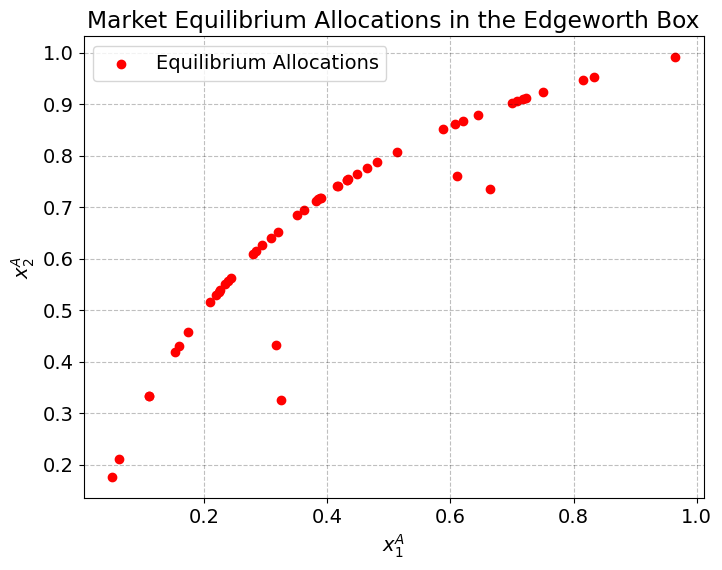

In [13]:
# Utility functions
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

# Constraint for B's utility
def constraint(x, omega_B, u_B_initial):
    x1_A, x2_A = x
    x1_B = 1 - x1_A
    x2_B = 1 - x2_A
    return u_B(x1_B, x2_B) - u_B_initial

# Objective function for A's utility
def objective(x):
    x1_A, x2_A = x
    return -u_A(x1_A, x2_A)  # We minimize the negative of u_A to maximize u_A

# Generating the random set W with 50 elements for omega1A and omega2A
np.random.seed(0)  # For reproducibility
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

# List to store equilibrium allocations
equilibrium_allocations = []

# Find market equilibrium allocation for each omega_A in W
for omega_1A, omega_2A in zip(omega_1A_samples, omega_2A_samples):
    omega_A = np.array([omega_1A, omega_2A])
    omega_B = 1 - omega_A
    
    # Initial utility for B
    u_B_initial = u_B(omega_B[0], omega_B[1])
    
    # Initial guess for A's allocation
    initial_guess = [0.5, 0.5]
    
    # Bounds for A's allocation
    bounds = [(0, 1), (0, 1)]
    
    # Constraint dictionary
    constraints = {'type': 'ineq', 'fun': constraint, 'args': (omega_B, u_B_initial)}
    
    # Perform the optimization
    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    # Optimized allocation for A
    x1_A_opt, x2_A_opt = result.x
    equilibrium_allocations.append((x1_A_opt, x2_A_opt))

# Extracting x1_A and x2_A for plotting
x1_A_eq, x2_A_eq = zip(*equilibrium_allocations)

# Plotting the equilibrium allocations in the Edgeworth box
plt.figure(figsize=(8, 6))
plt.scatter(x1_A_eq, x2_A_eq, c='red', label='Equilibrium Allocations')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()
